In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# We should not use "dropna"  now as it removes 6982 + rows 
# Instead it is Better to remove Columns "last_review" and "reviews_per_month "

In [2]:
df1 = pd.read_csv('Data/Train.csv',encoding="ISO-8859-1")

#country = pd.read_excel('Country-Code.xlsx')
#country.head()
df1.shape
#df1.isnull().sum()
#sns.distplot(df1['price'])
df1.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.587556,0.002922,0.093288,0.010100,-0.010127,-0.320246,0.292524,0.131495,0.084583
host_id,0.587556,1.000000,0.021635,0.128007,0.013679,-0.013519,-0.142471,0.293044,0.154071,0.199093
latitude,0.002922,0.021635,1.000000,0.085919,0.029195,0.024725,-0.014016,-0.004404,0.018272,-0.012063
longitude,0.093288,0.128007,0.085919,1.000000,-0.151930,-0.063447,0.055632,0.141266,-0.114418,0.085315
price,0.010100,0.013679,0.029195,-0.151930,1.000000,0.045746,-0.048459,-0.033186,0.053688,0.083439
minimum_nights,-0.010127,-0.013519,0.024725,-0.063447,0.045746,1.000000,-0.078890,-0.120635,0.128552,0.142466
number_of_reviews,-0.320246,-0.142471,-0.014016,0.055632,-0.048459,-0.078890,1.000000,0.544709,-0.072643,0.176161
reviews_per_month,0.292524,0.293044,-0.004404,0.141266,-0.033186,-0.120635,0.544709,1.000000,-0.010535,0.187968
calculated_host_listings_count,0.131495,0.154071,0.018272,-0.114418,0.053688,0.128552,-0.072643,-0.010535,1.000000,0.223409
availability_365,0.084583,0.199093,-0.012063,0.085315,0.083439,0.142466,0.176161,0.187968,0.223409,1.000000


# Null values in Column "name" = 12
# Null values in Column "host_name" =13

In [3]:
df1['name'].isnull().sum()


12

In [4]:
df1['host_name'].isnull().sum()

13

# Price distribution (Actual data set)

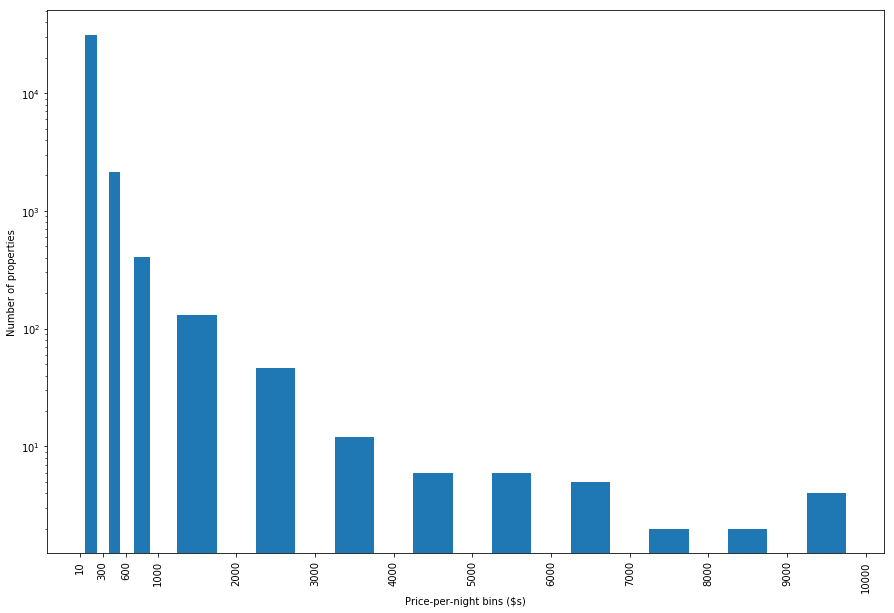

In [5]:
import matplotlib 
#matplotlib.rcParams["figure.figsize"] = (15,10)
plt.figure(figsize=(15,10))
plt.yscale('log')
plt.hist(df1.price,rwidth=0.5, bins = [1,300,600, 1000,2000, 3000, 4000,5000, 6000, 7000, 8000, 9000,10000 ])
plt.xlabel('Price-per-night bins ($s)')
plt.ylabel('Number of properties')
#plt.rcParams.update({'font.size': 26})
plt.xticks([10,300, 600, 1000,2000, 3000, 4000,5000, 6000, 7000, 8000, 9000,10000 ],rotation='vertical')
#plt.xscale('log')
plt.show()

# Price distribution (price<4000)

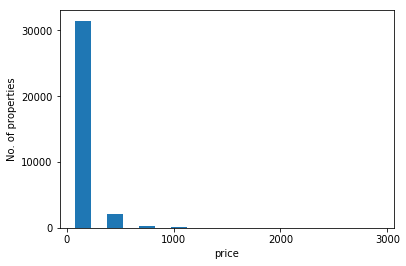

In [6]:
df2 = df1[df1.price<3000]
#plt.yscale('log')
plt.hist(df2.price,rwidth=0.5)
plt.xlabel('price')
plt.ylabel('No. of properties')
plt.rcParams.update({'font.size': 22})
plt.show()


# Price distribution (price<500)
# Majority of the properties (about 1/3 rd) are priced around 100 dollars
# only 892 properties cost more than 500 dollars

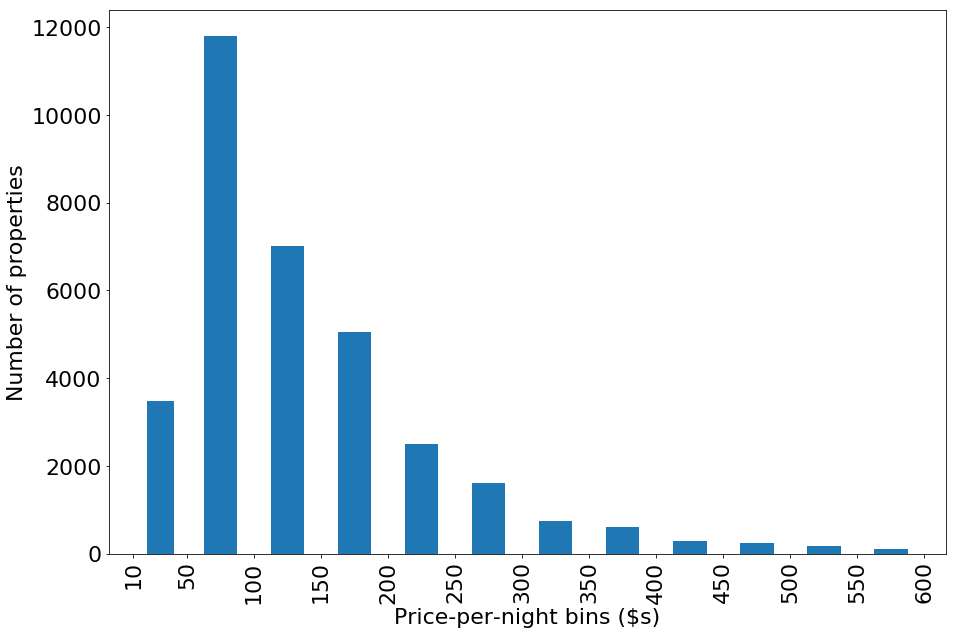

In [7]:
df2 = df1[df1.price < 600]
#plt.yscale('log')
plt.figure(figsize=(15,10))
plt.hist(df2.price,rwidth=0.5,bins = [10,50,100,150, 200,250, 300, 350, 400, 450, 500,550,600 ])
plt.xlabel('Price-per-night bins ($s)')
plt.ylabel('Number of properties')
plt.rcParams.update({'font.size': 22})
plt.xticks([10,50,100,150, 200,250, 300, 350, 400, 450, 500,550,600 ],rotation='vertical')
plt.show()

In [8]:
df1.shape

(34226, 16)

In [9]:
df2.shape

(33610, 16)

In [10]:
df2 = df1[df1.price>=500]
df2.shape

(892, 16)

# Distribution of room types (not working, kernal hangs!!!)

In [11]:
#plt.hist(df1.room_type,rwidth=0.5)
#plt.xlabel('Room_Type')
#plt.ylabel('No. of properties')
#plt.rcParams.update({'font.size': 22})
#plt.show()

# Finding total no of host_names

In [12]:
df1['host_name'].value_counts()

Michael              291
David                290
Sonder (NYC)         229
John                 208
Alex                 199
Daniel               168
Jessica              158
Sarah                156
Blueground           155
Andrew               144
Maria                143
Mike                 142
Anna                 136
Laura                130
Chris                127
Emily                113
Melissa              112
Brian                108
Kara                 105
Jason                104
Mark                 100
Michelle             100
Rachel                99
Ben                   98
Ken                   97
Jennifer              96
Adam                  96
James                 95
Amy                   95
Jonathan              95
                    ... 
Joachim                1
Karol                  1
Ameer                  1
Sharon And Ronn        1
Razia                  1
Anna & Keith           1
Zora & Chris           1
Mariame                1
Larisa                 1


# Total neighbourhood_groups

In [13]:
df1['neighbourhood_group'].value_counts()

Manhattan        15193
Brooklyn         14033
Queens            3985
Bronx              767
Staten Island      248
Name: neighbourhood_group, dtype: int64

#  Popular neighbourhoods

In [14]:
df1.groupby('neighbourhood_group')['neighbourhood'].value_counts()
df1.pivot_table(index=['neighbourhood_group', 'neighbourhood'], values = 'id',
                aggfunc='count').sort_values('id',ascending=False)

id
neighbourhood_group neighbourhood                   
Brooklyn            Williamsburg                2756
                    Bedford-Stuyvesant          2577
Manhattan           Harlem                      1877
Brooklyn            Bushwick                    1719
Manhattan           Upper West Side             1403
                    Hell's Kitchen              1383
                    East Village                1309
                    Upper East Side             1245
Brooklyn            Crown Heights               1085
Manhattan           Midtown                     1071
                    Chelsea                      791
                    East Harlem                  758
Brooklyn            Greenpoint                   735
Manhattan           Lower East Side              665
                    Washington Heights           637
Queens              Astoria                      634
Manhattan           West Village                 522
                    Financial District           518
Brooklyn            Flatbush                     425
                    Clinton Hill                 420
                    Prospect-Lefferts Gardens    379
Queens              Long Island City             374
Brooklyn            Park Slope                   353
                    East Flatbush                347
                    Fort Greene                  338
Manhattan           Murray Hill                  330
                    Kips Bay                     324
Queens              Ridgewood                    302
                    Flushing                     301
Brooklyn            Sunset Park                  278
...                                              ...
Bronx               Mount Eden                     4
                    Olinville                      4
Brooklyn            Mill Basin                     4
Staten Island       Dongan Hills                   4
Queens              Belle Harbor                   4
Staten Island       Grant City                     3
Queens              Bay Terrace                    3
Staten Island       Castleton Corners              3
                    Bull's Head                    3
                    Arden Heights                  3
Queens              Breezy Point                   3
Bronx               West Farms                     2
Staten Island       Todt Hill                      2
                    South Beach                    2
                    Silver Lake                    2
                    Emerson Hill                   2
                    Graniteville                   2
Queens              Holliswood                     2
                    Neponsit                       2
Bronx               Co-op City                     2
Staten Island       Howland Hook                   2
                    Eltingville                    2
                    Westerleigh                    2
                    Richmondtown                   1
                    Rosebank                       1
                    Rossville                      1
                    Bay Terrace, Staten Island     1
                    Lighthouse Hill                1
                    Huguenot                       1
Bronx               Spuyten Duyvil                 1

[217 rows x 1 columns]

# Finding average price of top host "Michael" by 'room_type'

In [15]:
df2 = df1[ df1['host_name']=='Michael']
df2.groupby('room_type')['price'].mean()

room_type
Entire home/apt    195.715909
Private room        81.266667
Shared room         72.100000
Name: price, dtype: float64

# Finding average price of top host "Michael" by ' 'neighbourhood_group'

In [16]:
df2.groupby('neighbourhood_group')['price'].mean()


neighbourhood_group
Bronx            111.666667
Brooklyn         114.818966
Manhattan        184.201389
Queens           131.560000
Staten Island     77.333333
Name: price, dtype: float64

# Finding average price of top host "Michael" by ' neighbourhood'

In [17]:
df2.groupby('neighbourhood')['price'].mean()

neighbourhood
Arverne                      300.000000
Astoria                       98.000000
Bay Ridge                    135.000000
Bedford-Stuyvesant            75.750000
Boerum Hill                  145.000000
Brighton Beach                83.333333
Brooklyn Heights             170.000000
Bushwick                      92.105263
Carroll Gardens              125.000000
Chelsea                      206.440000
Chinatown                    195.000000
Claremont Village            150.000000
Clinton Hill                 121.250000
Concord                      120.000000
Concourse Village             85.000000
Crown Heights                119.000000
East Harlem                   77.000000
East New York                 33.000000
East Village                 165.916667
Financial District           145.000000
Flatbush                     100.000000
Flatiron District            400.000000
Gowanus                      125.000000
Gramercy                     202.000000
Greenpoint                

# Costly hosts

In [18]:
df1[['host_name', 'neighbourhood_group','neighbourhood','room_type','price']].sort_values('price', ascending=False).head(10)

,host_name,neighbourhood_group,neighbourhood,room_type,price
29644,Erin,Brooklyn,Greenpoint,Entire home/apt,10000
12404,Jelena,Manhattan,Upper West Side,Entire home/apt,10000
12523,Matt,Manhattan,Lower East Side,Entire home/apt,9999
20810,Amy,Manhattan,Lower East Side,Private room,9999
23350,Rum,Manhattan,Tribeca,Entire home/apt,8500
31293,Jessica,Brooklyn,Clinton Hill,Entire home/apt,8000
3719,Sally,Manhattan,Upper East Side,Entire home/apt,7703
15974,Jack,Manhattan,Battery Park City,Entire home/apt,7500
7817,Kevin,Manhattan,Chelsea,Entire home/apt,6800
3754,Jonathan,Brooklyn,Clinton Hill,Entire home/apt,6500


# Cheap hosts

In [19]:
df1[['host_name', 'neighbourhood_group','neighbourhood','room_type','price']].sort_values('price', ascending=False).tail(20)

,host_name,neighbourhood_group,neighbourhood,room_type,price
18422,Katie,Brooklyn,Bushwick,Private room,10
26499,Julio,Brooklyn,Bushwick,Private room,10
9851,Maria,Queens,Jamaica,Entire home/apt,10
5582,Jennifer,Manhattan,SoHo,Private room,10
10766,Amy,Manhattan,Upper East Side,Entire home/apt,10
9973,Maria,Queens,Jamaica,Entire home/apt,10
4546,Martin,Brooklyn,Williamsburg,Private room,10
29613,Salim,Manhattan,Upper West Side,Private room,10
16917,Caterina,Brooklyn,Bedford-Stuyvesant,Entire home/apt,10
14631,Sally,Manhattan,East Village,Entire home/apt,10


# Code to calculate the distance between two points on Earth using lattitues and longitudes
# Sunny can use it for cross verification

In [20]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

lat1 = radians(40.70844)
lon1 = radians(-74.00615)
lat2 = radians(40.70724)
lon2 = radians(-74.00614)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

print("Distance in meters:", distance*1000)



('Distance in meters:', 133.47846302651442)


# Finding costly host_names for a 'Entire home/apt' in the most popular locality:  	Williamsburg, Brooklyn

<Figure size 1440x720 with 0 Axes>

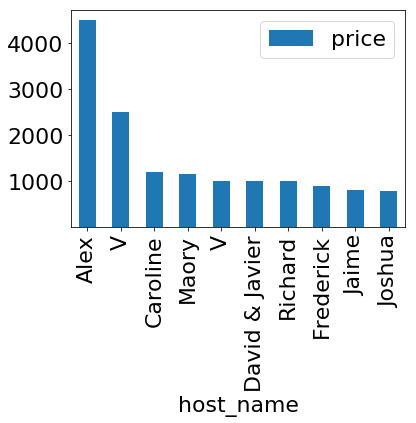

In [21]:
df2 = df1[ df1['room_type']=='Entire home/apt']

df3 = df2[ df2['neighbourhood_group']=='Brooklyn']

#df4 = df3[ df3['host_name']=='Sonder (NYC)']

#df3['neighbourhood'].value_counts()

df4=df3[df3['neighbourhood']=='Williamsburg']

df5 = df4[['id','name','host_name','host_id', 'price']].sort_values('price', ascending=False).head(10)
#plt.figure(figsize=(30,20))
plt.figure(figsize=(20,10))
df5.plot(kind='bar',x='host_name',y='price')
plt.yticks([1000,2000,3000,4000 ])

plt.show()

# Same plot with name of property

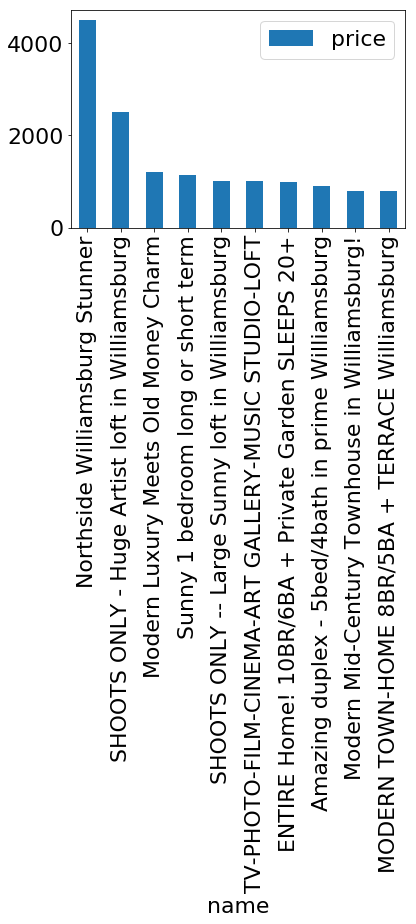

In [22]:
df5.plot(kind='bar',x='name',y='price')
plt.show()

# Finding cheap host_names for a 'Entire home/apt' in the most popular locality:  	Williamsburg, Brooklyn

<Figure size 1440x720 with 0 Axes>

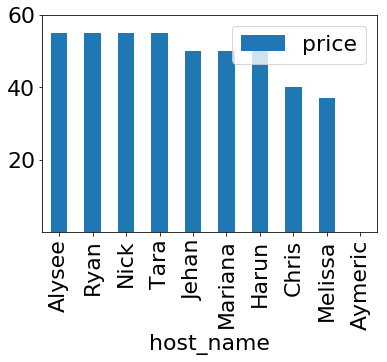

In [23]:
df5 = df4[['id','name','host_name','host_id', 'price']].sort_values('price', ascending=False).tail(10)
plt.figure(figsize=(20,10))
df5.plot(kind='bar',x='host_name',y='price')
plt.yticks([20,40,60 ])
plt.show()

# Same plot with name of property

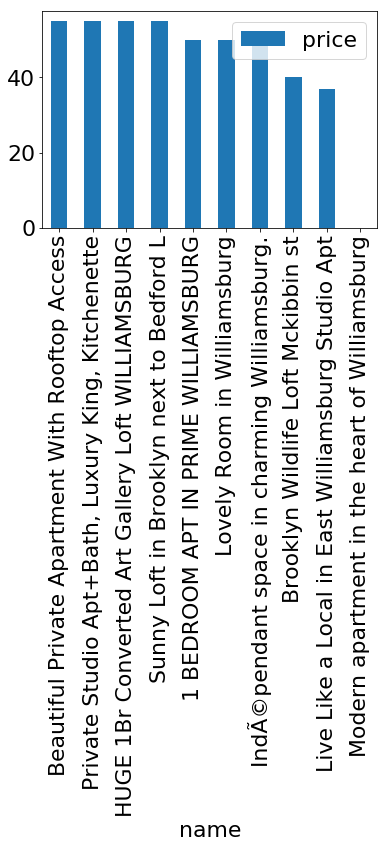

In [24]:
df5.plot(kind='bar',x='name',y='price')
plt.show()

# Pandas Profiling for automated EDA analysis
# To install Pandas Profiling use following command
# pip install pandas-profiling

In [25]:
 #from pandas_profiling import ProfileReport
 #profile = ProfileReport(df1,title='Pandas Profiling Report')
 #profile

# Modelling

# 1. DATA CLEANING : Removing unneessary columns (except 'host_id', neighbourhood_group',latitude', 'longitude', 'room_type', 'price')

In [26]:
df1.columns

Index([u'id', u'name', u'host_id', u'host_name', u'neighbourhood_group',
       u'neighbourhood', u'latitude', u'longitude', u'room_type', u'price',
       u'minimum_nights', u'number_of_reviews', u'last_review',
       u'reviews_per_month', u'calculated_host_listings_count',
       u'availability_365'],
      dtype='object')

In [27]:
len(df1.neighbourhood.unique())
location_stats = df1.groupby('neighbourhood')['neighbourhood'].agg('count').sort_values(ascending=False)
len(location_stats[location_stats<=100])
location_stats_lessthan_100 = location_stats[location_stats<=100]
location_stats_lessthan_100 
df1.neighbourhood = df1.neighbourhood.apply(lambda x: 'other' if x in location_stats_lessthan_100 else x )
len(df1.neighbourhood.unique())
df1.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,2015-09-01,0.06,3,0
1,2243769,Super Bowl New York City Apartment,11460768,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,NaN,NaN,1,0
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,2019-07-05,4.00,1,365
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,other,40.60110,-74.07830,Shared room,30,2,0,NaN,NaN,4,82
4,3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,2019-05-26,0.27,1,365


In [28]:
X_enc_rt = pd.get_dummies(df1.room_type, prefix='Roomtype')
X_enc_rt.head()
X_enc_nhg = pd.get_dummies(df1.neighbourhood_group, prefix='NBG')
X_enc_nh = pd.get_dummies(df1.neighbourhood, prefix='NB')

df11 = pd.concat([df1, X_enc_rt.drop('Roomtype_Shared room',axis='columns')], axis=1)
df11 = pd.concat([df11, X_enc_nhg.drop('NBG_Staten Island',axis='columns')], axis=1)
#df11 = pd.concat([df1, X_enc_nhg.drop('NBG_Staten Island',axis='columns')], axis=1)
df11 = pd.concat([df11, X_enc_nh.drop('NB_other',axis='columns')], axis=1)
df11.shape



(34226, 81)

In [29]:
#df2=df1.drop(['id', 'name', 'host_name', 'neighbourhood_group',
#       'neighbourhood','minimum_nights', 'number_of_reviews', 'last_review',
#       'reviews_per_month', 'calculated_host_listings_count',
#       'availability_365'], axis='columns')
# did not work we can only drop 8 columns at a time

In [30]:
df2=df11.drop(['id', 'name', 'host_name',
       'neighbourhood','minimum_nights', 'number_of_reviews'], axis='columns')
df2.shape

(34226, 75)

In [31]:
 df3=df2.drop(['last_review','reviews_per_month', 'calculated_host_listings_count','availability_365'], axis='columns')
#df3=df2.drop(['last_review','reviews_per_month', 'calculated_host_listings_count'], axis='columns')

In [32]:
df3.shape
#df2.columns

(34226, 71)

In [33]:
df3.isnull().sum() # no null values in df3

host_id                         0
neighbourhood_group             0
latitude                        0
longitude                       0
room_type                       0
price                           0
Roomtype_Entire home/apt        0
Roomtype_Private room           0
NBG_Bronx                       0
NBG_Brooklyn                    0
NBG_Manhattan                   0
NBG_Queens                      0
NB_Astoria                      0
NB_Bay Ridge                    0
NB_Bedford-Stuyvesant           0
NB_Boerum Hill                  0
NB_Brooklyn Heights             0
NB_Bushwick                     0
NB_Canarsie                     0
NB_Carroll Gardens              0
NB_Chelsea                      0
NB_Chinatown                    0
NB_Clinton Hill                 0
NB_Crown Heights                0
NB_Ditmars Steinway             0
NB_East Elmhurst                0
NB_East Flatbush                0
NB_East Harlem                  0
NB_East New York                0
NB_East Villag

# dropping the column "room_type"

In [34]:
df4 = df3.drop(['room_type'],axis='columns')
df4.head()

,host_id,neighbourhood_group,latitude,longitude,price,Roomtype_Entire home/apt,Roomtype_Private room,NBG_Bronx,NBG_Brooklyn,NBG_Manhattan,...,NB_Sunset Park,NB_Theater District,NB_Tribeca,NB_Upper East Side,NB_Upper West Side,NB_Washington Heights,NB_West Village,NB_Williamsburg,NB_Windsor Terrace,NB_Woodside
0,4271676,Manhattan,40.72217,-73.99481,120,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,11460768,Manhattan,40.80020,-73.96045,1500,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,267193767,Queens,40.75558,-73.89316,200,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,43392243,Staten Island,40.60110,-74.07830,30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16065171,Manhattan,40.81022,-73.94266,115,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# 2 REMOVING OUTLIERS

In [35]:
df4.describe()

,host_id,latitude,longitude,price,Roomtype_Entire home/apt,Roomtype_Private room,NBG_Bronx,NBG_Brooklyn,NBG_Manhattan,NBG_Queens,...,NB_Sunset Park,NB_Theater District,NB_Tribeca,NB_Upper East Side,NB_Upper West Side,NB_Washington Heights,NB_West Village,NB_Williamsburg,NB_Windsor Terrace,NB_Woodside
count,3.422600e+04,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,...,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000
mean,6.733847e+07,40.729059,-73.952070,153.480979,0.520920,0.455619,0.022410,0.410010,0.443902,0.116432,...,0.008122,0.006165,0.003477,0.036376,0.040992,0.018612,0.015252,0.080524,0.002980,0.004909
std,7.833091e+07,0.054604,0.046161,243.312608,0.499569,0.498034,0.148015,0.491842,0.496850,0.320747,...,0.089759,0.078276,0.058863,0.187226,0.198275,0.135151,0.122554,0.272106,0.054511,0.069890
min,2.438000e+03,40.499790,-74.244420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.824440e+06,40.690040,-73.983150,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.065628e+07,40.722995,-73.955700,107.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.074344e+08,40.763200,-73.935982,175.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.743115e+08,40.913060,-73.712990,10000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
#def remove_price_outliers(df):
#    df_out = pd.DataFrame()
#    for key, subdf in df.groupby('neighbourhood_group'):
#        m = np.mean(subdf.price)
#        st = np.std(subdf.price)
#        reduce_df=subdf[(subdf.price>(m-3*st)) & (subdf.price<=(m+3*st))]
#        df_out= pd.concat([df_out,reduce_df],ignore_index=True)
#        return df_out
df5 = df4[df4.price < 300]
df6 = df5[df5.price >= 35]
#df6 = remove_price_outliers(df5)
df6.head()


,host_id,neighbourhood_group,latitude,longitude,price,Roomtype_Entire home/apt,Roomtype_Private room,NBG_Bronx,NBG_Brooklyn,NBG_Manhattan,...,NB_Sunset Park,NB_Theater District,NB_Tribeca,NB_Upper East Side,NB_Upper West Side,NB_Washington Heights,NB_West Village,NB_Williamsburg,NB_Windsor Terrace,NB_Woodside
0,4271676,Manhattan,40.72217,-73.99481,120,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,267193767,Queens,40.75558,-73.89316,200,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16065171,Manhattan,40.81022,-73.94266,115,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,51105827,Manhattan,40.71192,-74.01572,225,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,86892032,Queens,40.65766,-73.72838,60,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df7 = df6.drop(['neighbourhood_group'],axis='columns')
df7.shape

(30807, 69)

# 3 LINEAR REGRESSION

In [56]:
X=df7.drop('price', axis='columns')
X.head()
X.shape

(30807, 68)

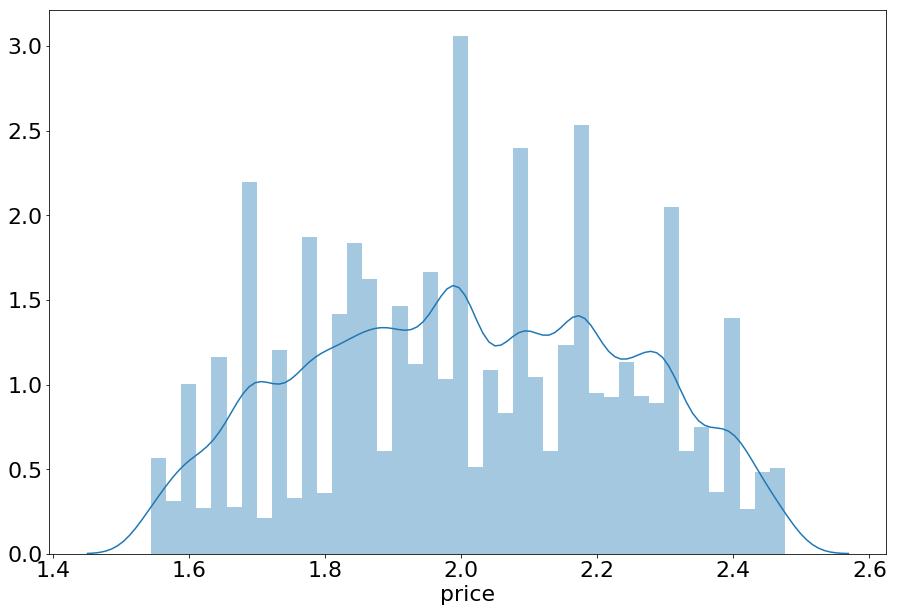

In [57]:
y = df7.price
#y = np.log(y)
#y = y/250.0
y = np.log10(y)
y.shape
plt.figure(figsize=(15,10))
sns.distplot(y)
plt.show()

# K-fold cross validation

In [63]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.56904421, 0.56230641, 0.56771017, 0.57504045, 0.5651273 ])

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1000)


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
sklr = LinearRegression()
lm = sklr.fit(X_train,y_train)
score = sklr.score(X_test,y_test)
preds = sklr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
#print("RMSE: %f" % np.exp(rmse))
print("RMSE: %f" % 10**(rmse))
#print("RMSE: %f" % rmse)

predictions_train = lm.predict(X_train)

#print ( "Train Value :", np.exp(y_train.head(5).values))
#print ( "Pretiction  :", np.exp(predictions_train[0:5]))

print ( "Train Value :", 10**(y_train.head(5).values))
print ( "Pretiction  :", 10**(predictions_train[0:5]))

#print ( "Train Value :", y_train.head(5).values)
#print ( "Pretiction  :", predictions_train[0:5])


predictions_test = lm.predict(X_test)


#print ( "Test Value :", np.exp(y_test.head(5).values))
#print ( "Pretiction  :", np.exp(predictions_test[0:5]))

print ( "Test Value :", 10**(y_test.head(5).values))
print ( "Pretiction  :", 10**(predictions_test[0:5]))

#print ( "Test Value :", y_test.head(5).values)
#print ( "Pretiction  :", predictions_test[0:5])


#print ( "Test Value :", np.exp(y_test.head(5).values))
#print ( "Pretiction", np.exp(predictions_test[0:5]))

print ('Score:', score)


RMSE: 1.423728
('Train Value :', array([156.,  72.,  80., 160., 180.]))
('Pretiction  :', array([188.55600853, 121.87845782,  50.35016614, 152.12039445,
       187.30583548]))
('Test Value :', array([283., 150.,  99.,  55.,  79.]))
('Pretiction  :', array([141.32307235, 154.45334705, 105.88612198,  80.54691742,
       165.4227292 ]))
('Score:', 0.570329033182013)


In [42]:
# from xgboost import XGBClassifier

# price outliers (price>25 and price<500). sklr.score = 0.2812380 ! very poor
# price outliers (price>50 and price<300). sklr.score = 0.3319087 ! very poor
# price outliers (price>60 and price<250). sklr.score = 0.2721123 ! very poor
#
# THE SCORE MUST BE > .80 the more closer to 1.0 the better it is!!!!

# Will score imporve if host_id also removed?? (NO)

In [60]:
X1=X.drop('host_id',axis='columns')
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.2, random_state=10)
sklr = LinearRegression()
sklr.fit(X_train,y_train)
sklr.score(X_test,y_test)

0.5615841457124552

# Guys this model did not work.
# My first model failed !!!!!!!!!!

# Finding the best model using 'sklearn' GridSearchCV

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit



In [62]:
def gridsearchcv_to_find_best_model(X,y):
    algos = {
        'linear_regression' :{
            'model' : LinearRegression(),
            'params': {
                'normalize' : [True, False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params': {
                'alpha' : [1,2],
                'selection' : ['random','cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter'  : ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0 )
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_,
        })
    return pd.DataFrame(scores,columns = ['model', 'best_score', 'best_params'])

gridsearchcv_to_find_best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.567846,{u'normalize': True}
1,decision_tree,0.240481,"{u'splitter': u'best', u'criterion': u'friedma..."
2,lasso,0.004123,"{u'alpha': 1, u'selection': u'random'}"


# Linear Regression is the best sofar   